In [32]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import math

In [33]:
# Set the field name
field_name = "EoR2"
field_number = int(field_name[3])
assert(field_number <= 2)
print("Generating EoR%s list\n"%(str(field_number)))

Generating EoR2 list



In [34]:
#Set the pickle file name
EoR_pickle = field_name + ".pickle"

In [35]:
#Set the field centre
c_EoR0 = SkyCoord('0h00m00.0s', '-27d00m00s', frame='icrs')
c_EoR1 = SkyCoord('4h00m00.0s', '-30d00m00s', frame='icrs')
c_EoR2 = SkyCoord('11h20m00.0s', '-10d00m00s', frame='icrs')
c_fields = [c_EoR0, c_EoR1, c_EoR2]
c_EoR = c_fields[field_number]
print("Using filed centre coordinates ", c_EoR)

Using filed centre coordinates  <SkyCoord (ICRS): (ra, dec) in deg
    (170., -10.)>


In [36]:
#Load the pickle with the source list
pickle_in = open(EoR_pickle,"rb")
EoR_plist = pickle.load(pickle_in)
pickle_in.close()
n_EoR_20deg = len(EoR_plist)
print("Number of sources in the list is ", n_EoR_20deg)

Number of sources in the list is  20026


In [37]:
# A list of 20 GLEAM frequencies and corresponding column indices
freqs = [76,84,92,99,107,115,122,130,143,151,158,166,174,181,189,197,204,212,220,227]
idx = [31,45,59,73,87,101,115,129,143,157,171,185,199,213,227,241,255,269,283,297]

In [38]:
# Plot a spectrum for some arbitrary source to check the consistency
indx = 5000
spind = EoR_plist[indx][306]
flux = []
fluxerr = []
flux_fitted = []
flux_wide = []
flux_wide.append(EoR_plist[indx][309])
flux_wide_err = []
flux_wide_err.append(EoR_plist[indx][310])
j = 0
for i in idx:
    flux.append(EoR_plist[indx][i-1])
    fluxerr.append(EoR_plist[indx][i])
    flux_fit = flux_wide[0]*(freqs[j]/200.)**spind
    flux_fitted.append(flux_fit)
    j = j+1

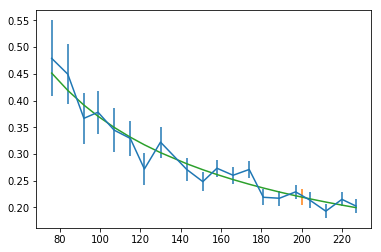

In [39]:
plt.errorbar(freqs, flux, fluxerr);
plt.errorbar([200], flux_wide, flux_wide_err);
plt.plot(freqs, flux_fitted);

In [40]:
# Create the lists for 2, 5, and 10 degree radius
EoR_2deg_osm = []
EoR_5deg_osm = []
EoR_10deg_osm = []
n = n_EoR_20deg
for i in range(n):
    if(i%1000 == 0):
        print(i, n)
    c1 = SkyCoord(EoR_plist[i][3], EoR_plist[i][4], unit=(u.hourangle, u.deg), frame='icrs')
    sep = c_EoR.separation(c1)
    if sep.deg <= 10.0:
        EoR_10deg_osm.append(EoR_plist[i])
        if sep.deg <= 5.0:
            EoR_5deg_osm.append(EoR_plist[i])
            if sep.deg <= 2.0:
                EoR_2deg_osm.append(EoR_plist[i])   

0 20026
1000 20026
2000 20026
3000 20026
4000

 20026
5000 20026
6000 20026
7000 20026
8000 20026
9000 20026
10000 20026
11000 20026
12000 20026
13000 20026
14000 20026
15000 20026
16000 20026
17000 20026
18000 20026
19000 20026
20000 20026


In [41]:
print("The number of sources in 2, 5 and 10 deg. lists: ", len(EoR_2deg_osm), len(EoR_5deg_osm), len(EoR_10deg_osm))

The number of sources in 2, 5 and 10 deg. lists:  209 1410 5359


In [42]:
# List of radius in deg for the catalogues
radius = [2,5,10,20]
ntot = []

In [43]:
# A header
buf_s = []
buf_s.append("#\n")
buf_s.append("#  RA,    Dec,   I,    Q,    U,    V,   freq0, spix,  RM,      maj,      min,      pa\n")
buf_s.append("# (deg), (deg), (Jy), (Jy), (Jy), (Jy), (Hz), (-), (rad/m^2), (arcsec), (arcsec), (deg)\n")
buf_s.append("#\n")
buf_s.append("\n")

def print_header(file, buf):
    for i in range(len(buf)):
        file.write(str(buf[i]).encode('ascii'))

In [44]:
EoR_osm = [EoR_2deg_osm, EoR_5deg_osm, EoR_10deg_osm, EoR_plist]

In [47]:
for m in range(len(radius)):
    fname      = field_name + "_" + str(radius[m]) + "deg.osm"
    fname_geom = field_name + "_" + str(radius[m]) + "deg_geom.osm"
    print("Generating %s and %s\n"%(fname, fname_geom))
    f      = open(fname, 'wb')
    f_geom = open(fname_geom, 'wb')
    print_header(f, buf_s)
    print_header(f_geom, buf_s)
    n = len(EoR_osm[m])
    n2 = 0
    for i in range(n):
        c1 = SkyCoord(EoR_osm[m][i][3], EoR_osm[m][i][4], unit=(u.hourangle, u.deg), frame='icrs')
        if not math.isnan(EoR_osm[m][i][309]):
            buf = "%f, %f, %f, 0,0,0,200e6,%f,0.0,0,0,0\n"%(c1.ra.deg, c1.dec.deg, EoR_osm[m][i][309], EoR_osm[m][i][306])
            f.write(buf.encode('ascii'))
            buf = "%f, %f, %f, 0,0,0,200e6,%f,0.0,%f,%f,%f\n"%(c1.ra.deg, c1.dec.deg, EoR_osm[m][i][309], EoR_osm[m][i][306], EoR_osm[m][i][13], EoR_osm[m][i][15], EoR_osm[m][i][17])
            f_geom.write(buf.encode('ascii'))
            n2 += 1
    ntot.append(n2)
    f.close()
    f_geom.close()

Generating EoR2_2deg.osm and EoR2_2deg_geom.osm

Generating EoR2_5deg.osm and EoR2_5deg_geom.osm

Generating EoR2_10deg.osm and EoR2_10deg_geom.osm



Generating EoR2_20deg.osm and EoR2_20deg_geom.osm



In [46]:
print("The number of sources in 2, 5, 10 and 20 deg osm: ", ntot[0], ntot[1], ntot[2], ntot[3])

The number of sources in 2, 5, 10 and 20 deg osm:  148 1049 3936 14965
